# Heart Rate Variability(HRV) processing pipeline in *Python*

## Step 1: Import the raw data

In [1]:
import neurokit2 as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
%matplotlib inline
data = loadmat('D:/2021_Data_Analysis/2021_VR_Emotion/sub_001_helpless_1.mat')
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

## Step 2: ECG data extraction and cleaning

In [2]:
ecg=data['ecg_hl1']#Extract the ECG signal;
ecg=np.ndarray.flatten(ecg);#Flatten the 2-D array to 1-D
ecg_cleaned=nk.ecg_clean(ecg,sampling_rate=2000)

## Step 3: Obtain the peaks of the ECG signal

In [6]:
peaks,rpeaks=nk.ecg_peaks(ecg_cleaned,sampling_rate=2000,method="neurokit",correct_artifacts=True)

## Step 4: Time-doamin analysis

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI
0,20.97492,722.939189,24.105487,21.046457,0.033344,0.029013,726.0,26.6868,0.036759,36.5,0.675676,33.783784,112.5,4.774194


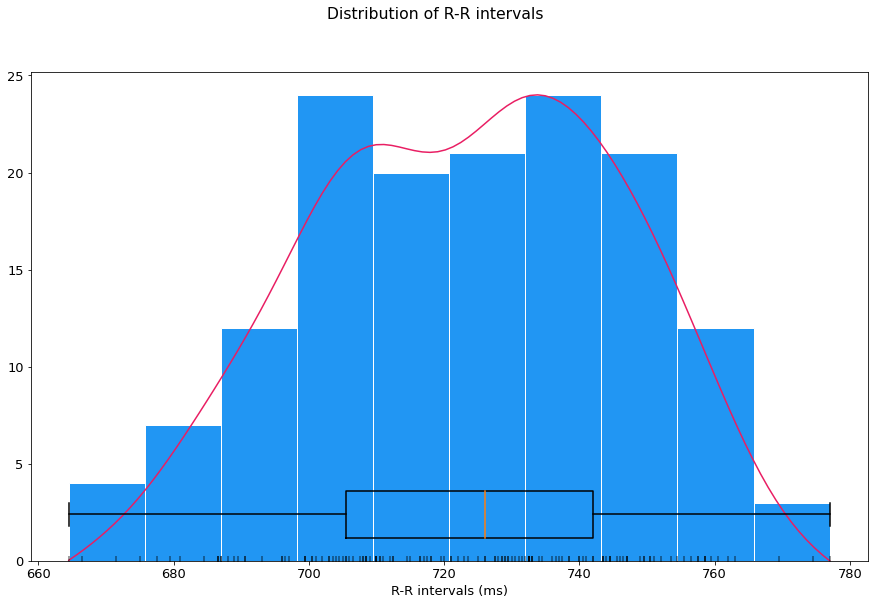

In [8]:
hrv_time=nk.hrv_time(peaks,sampling_rate=2000,show=True);hrv_time

## Step 5: Frequency-domain Analysis

,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF
0,NaN,NaN,0.046789,0.032597,0.00252,1.435378,0.571254,0.397982,-3.423534


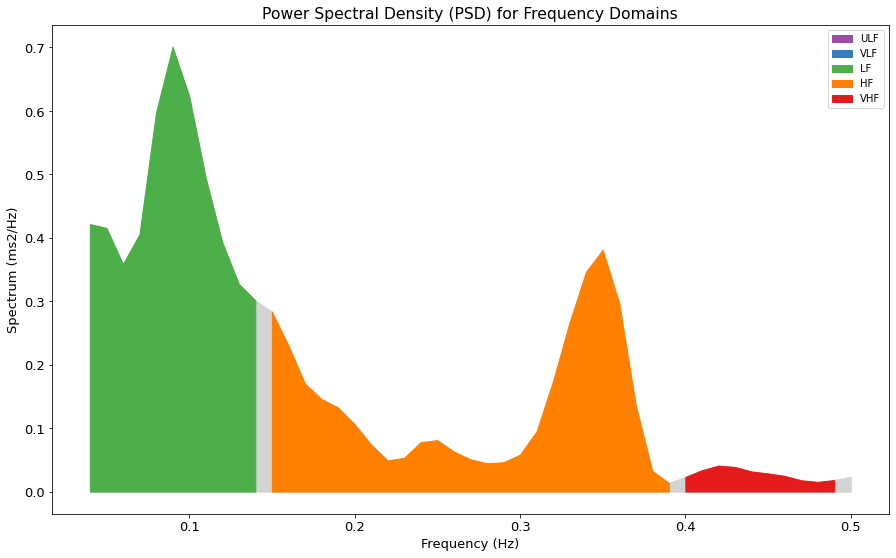

In [10]:
hrv_freq=nk.hrv_frequency(peaks,sampling_rate=2000,show=True);hrv_freq

## Step 6: Non-linear Domain Analysis

,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_DFA,HRV_CorrDim
0,14.882092,30.760511,0.483805,1438.160689,2.066948,3.864778,254.321514,0.513514,0.513889,0.72973,...,0.454381,17.848161,16.287659,0.770667,1.909543,0.0,1.339362,1.816859,1.045678,1.505713


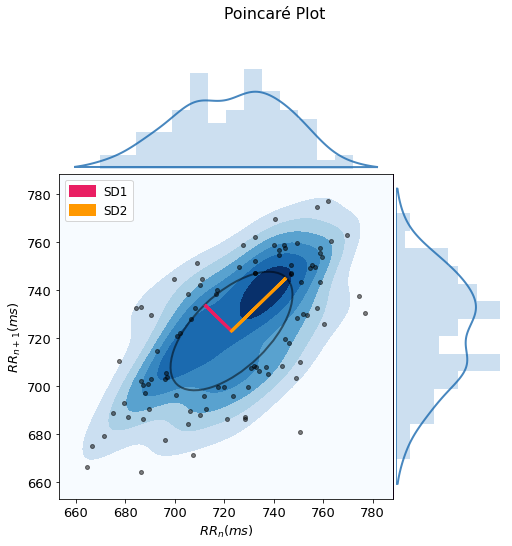

In [11]:
hrv_non=nk.hrv_nonlinear(peaks,sampling_rate=2000,show=True);hrv_non

## All domains

,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,...,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn,HRV_MSE,HRV_CMSE,HRV_RCMSE,HRV_DFA,HRV_CorrDim
0,419.498405,14458.783784,482.109742,420.929132,0.033344,0.029013,14520.0,533.736,0.036759,730.0,...,0.454381,356.963216,325.753181,0.770667,1.909543,0.0,1.339362,1.816859,1.045678,1.505713


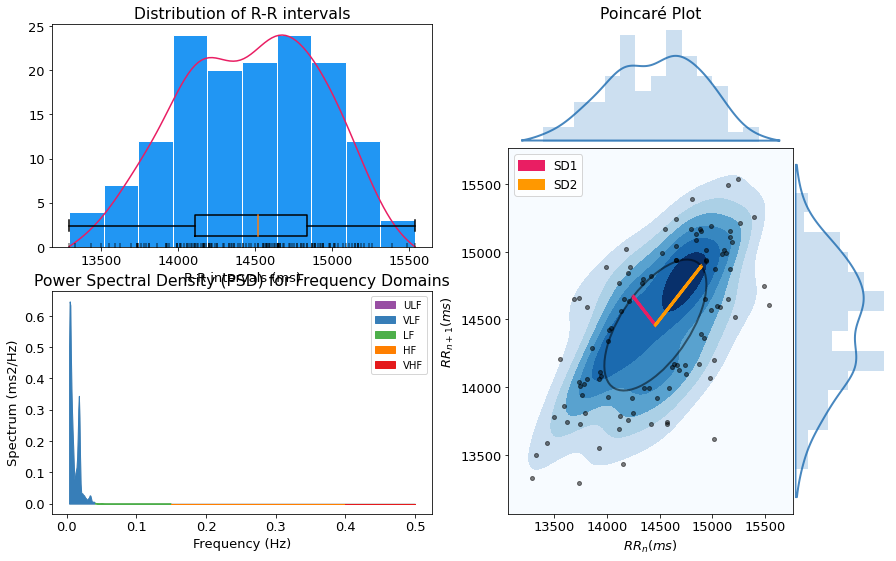

In [12]:
hrv_indices = nk.hrv(peaks, sampling_rate=100, show=True)
hrv_indices